<div style="background-color:#9dedde; padding: 20px">
<h2>Projet 7 : Implémentez un modèle de Scoring</h2>
</div>

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly import tools
import plotly.express as px
from datetime import datetime
import datetime

# pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 1000)

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b>Chargement des données</b>
    </h2>
</div>


In [142]:
df = pd.read_csv("app_train_sample_clean.csv")

In [143]:
df.shape

(30751, 20)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TYPE_CONTRAT            30751 non-null  object 
 1   AGE                     30751 non-null  int64  
 2   ID_CLIENT               30751 non-null  int64  
 3   CIBLE                   30751 non-null  int64  
 4   STATUT_FAMILIAL         30751 non-null  object 
 5   YEARS_EMPLOYED          30751 non-null  int64  
 6   TOTAL_CREDIT            30751 non-null  float64
 7   REMB_MENSUEL            30751 non-null  float64
 8   PROPRIETAIRE_BIEN_IMMO  30751 non-null  object 
 9   CNT_FAM_MEMBERS         30751 non-null  float64
 10  TYPE_REVENUS            30751 non-null  object 
 11  GENRE                   30751 non-null  object 
 12  MONTANT_PRIX_BIENS      30727 non-null  float64
 13  NIVEAU_EDUCATION        30751 non-null  object 
 14  REVENU_TOTAL            30751 non-null

In [145]:
df.dtypes

TYPE_CONTRAT               object
AGE                         int64
ID_CLIENT                   int64
CIBLE                       int64
STATUT_FAMILIAL            object
YEARS_EMPLOYED              int64
TOTAL_CREDIT              float64
REMB_MENSUEL              float64
PROPRIETAIRE_BIEN_IMMO     object
CNT_FAM_MEMBERS           float64
TYPE_REVENUS               object
GENRE                      object
MONTANT_PRIX_BIENS        float64
NIVEAU_EDUCATION           object
REVENU_TOTAL              float64
SOURCE_EXTERNE_2          float64
FLAG_DOCUMENT_3             int64
FLAG_DOCUMENT_6             int64
FLAG_DOCUMENT_8             int64
PROPRIETAIRE_VOITURE       object
dtype: object

In [146]:
df.tail()

,TYPE_CONTRAT,AGE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,PROPRIETAIRE_VOITURE
30746,Cash loans,41,311641,0,Married,3,808650.0,23773.5,N,3.0,State servant,F,675000.0,Secondary / secondary special,90000.0,0.621768,1,0,0,N
30747,Cash loans,38,151728,1,Single / not married,20,85500.0,9108.0,Y,1.0,Working,M,85500.0,Secondary / secondary special,40500.0,0.393861,1,0,0,N
30748,Revolving loans,44,384640,0,Married,-1000,247500.0,12375.0,Y,2.0,Pensioner,F,247500.0,Higher education,69750.0,0.673987,0,0,0,Y
30749,Cash loans,60,437079,0,Widow,-1000,270000.0,9828.0,Y,1.0,Pensioner,F,270000.0,Secondary / secondary special,36000.0,0.546689,0,1,0,N
30750,Cash loans,59,389739,0,Widow,3,1288350.0,37053.0,Y,1.0,Working,F,1125000.0,Secondary / secondary special,148500.0,0.670388,0,1,0,Y


In [147]:
df.head()

,TYPE_CONTRAT,AGE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,PROPRIETAIRE_VOITURE
0,Cash loans,48,196888,0,Married,0,1350000.0,39604.5,Y,2.0,Working,F,1350000.0,Higher education,135000.0,0.761443,1,0,0,N
1,Cash loans,54,101392,0,Civil marriage,2,573628.5,24435.0,Y,2.0,Working,F,463500.0,Higher education,81000.0,0.396825,1,0,0,Y
2,Cash loans,25,435135,0,Single / not married,2,298512.0,19948.5,N,1.0,Working,F,270000.0,Higher education,112500.0,0.385353,1,0,0,N
3,Cash loans,30,396314,0,Married,5,218016.0,17352.0,N,2.0,Working,M,180000.0,Higher education,81000.0,0.545649,1,0,0,N
4,Cash loans,44,341153,1,Married,0,1006920.0,42790.5,Y,2.0,Working,F,900000.0,Secondary / secondary special,90000.0,0.444443,1,0,0,N


<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Analyse Exploratoire ---- Features numériques</b>
    </h2>
</div>


In [148]:
numeric_columns = df.select_dtypes(include=np.number)

<Axes: >

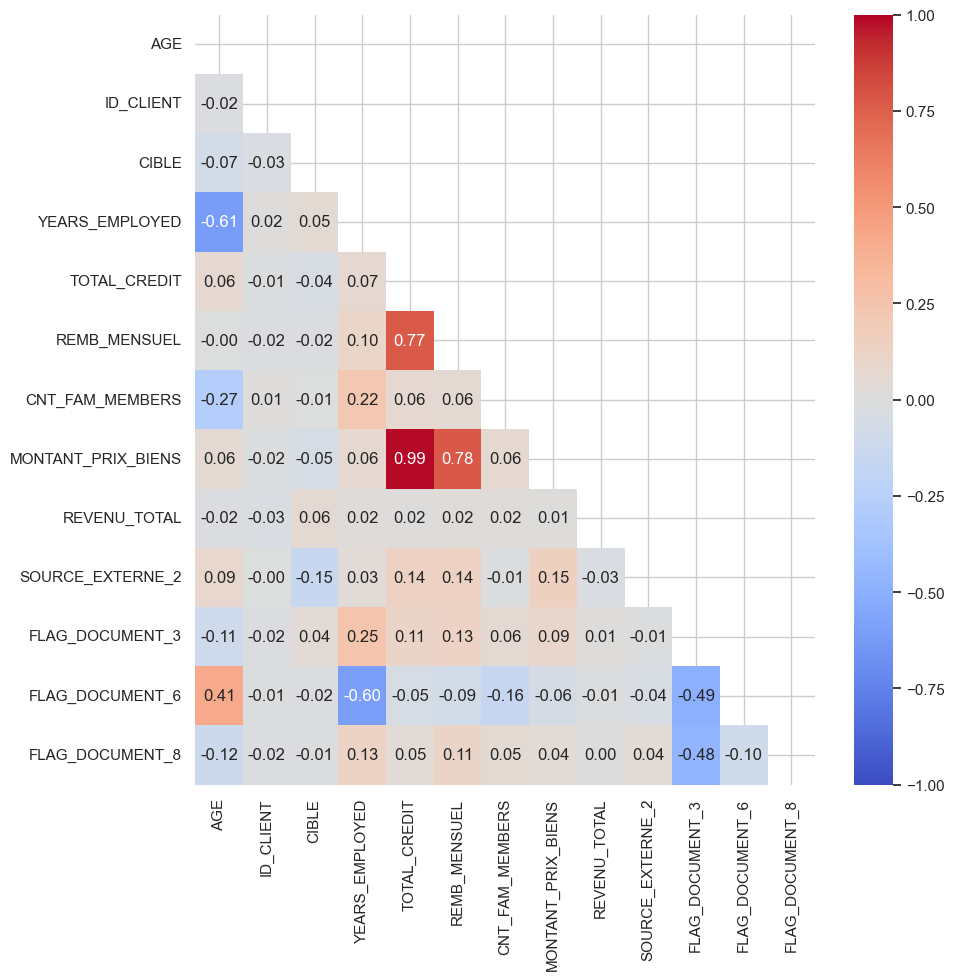

In [149]:
fig = plt.subplots(1, 1, figsize=(10, 10))
corr = numeric_columns.sample(frac=0.1).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, mask=mask, fmt=".2f")

In [150]:
df.CIBLE.value_counts()

CIBLE
0    28280
1     2471
Name: count, dtype: int64

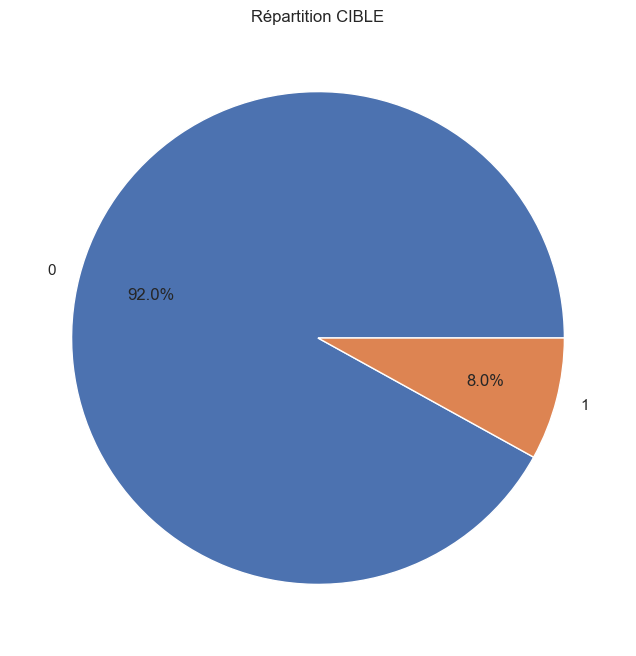

In [151]:
note_pie = df["CIBLE"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(note_pie, labels=note_pie.index, autopct="%1.1f%%", pctdistance=0.7)
plt.title("Répartition CIBLE")
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Age</b>
    </h2>
</div>


C:\Users\acer6\AppData\Local\Temp\ipykernel_22292\2408682498.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



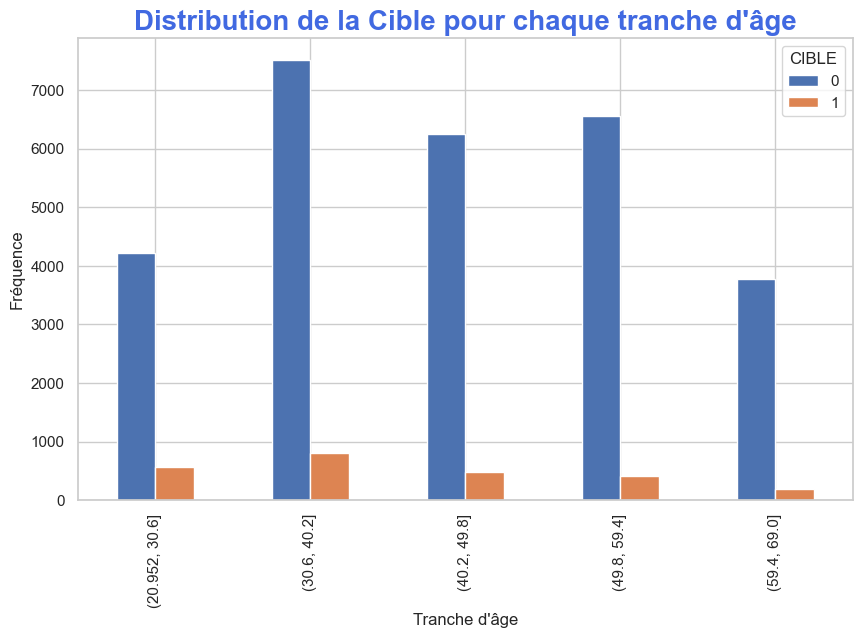

In [152]:
age_group_cible = df.groupby([pd.cut(df["AGE"], bins=5), "CIBLE"]).size().unstack()

age_group_cible.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.xlabel("Tranche d'âge")
plt.ylabel("Fréquence")
plt.title(
    "Distribution de la Cible pour chaque tranche d'âge",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.legend(title="CIBLE", labels=["0", "1"])
plt.show()

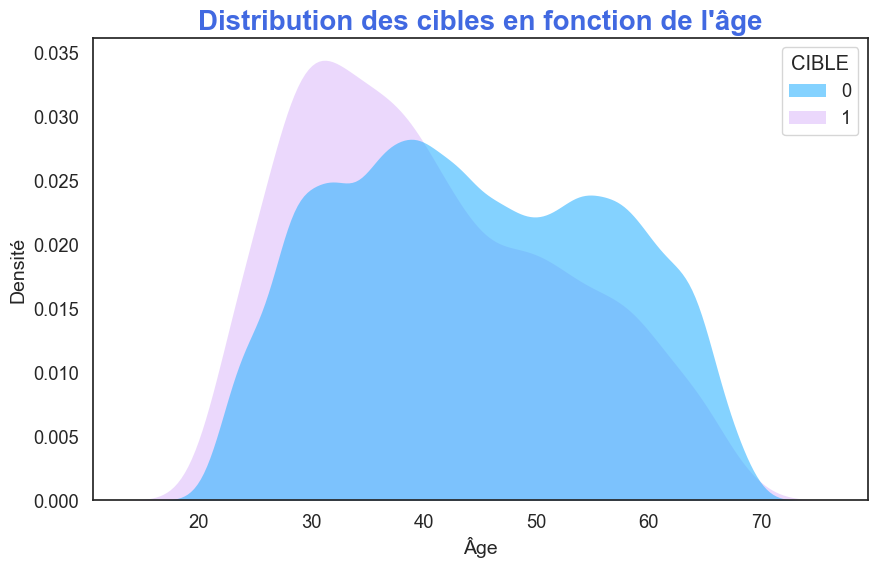

In [153]:
custom_colors = ["#33b4ff", "#debefa"]  # Définir des couleurs personnalisées


sns.set(style="white", palette=custom_colors, font_scale=1.2)


plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df, x="AGE", hue="CIBLE", fill=True, common_norm=False, alpha=0.6, linewidth=0
)
plt.xlabel("Âge", fontsize=14)
plt.ylabel("Densité", fontsize=14)
plt.title(
    "Distribution des cibles en fonction de l'âge",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.grid(False)  # Retirer la grille
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 600px;">
    <h2>
        <b> Relation Cible x Nombre membre de la famille</b>
    </h2>
</div>


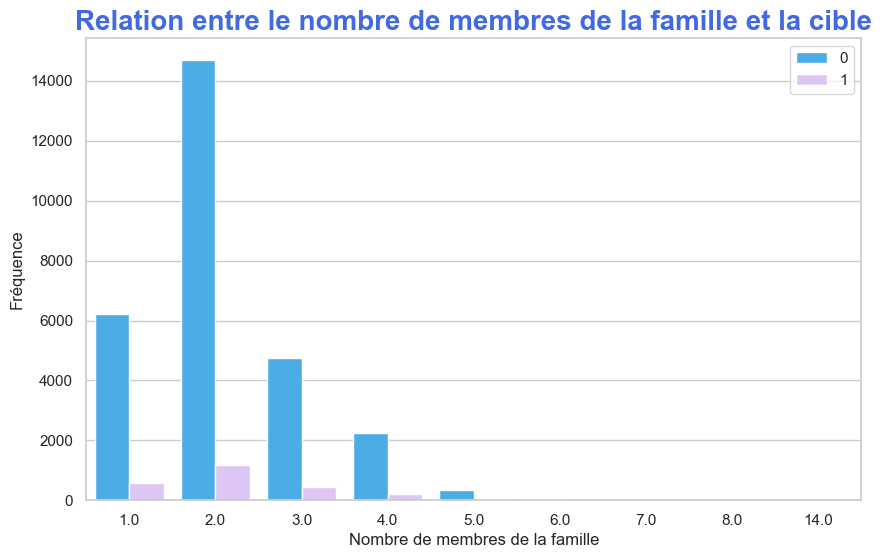

In [154]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="CNT_FAM_MEMBERS", hue="CIBLE", data=df, palette=custom_palette)

# Ajouter des titres et des étiquettes
plt.xlabel("Nombre de membres de la famille")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le nombre de membres de la famille et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.legend(loc="upper right")
# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Total Credit</b>
    </h2>
</div>


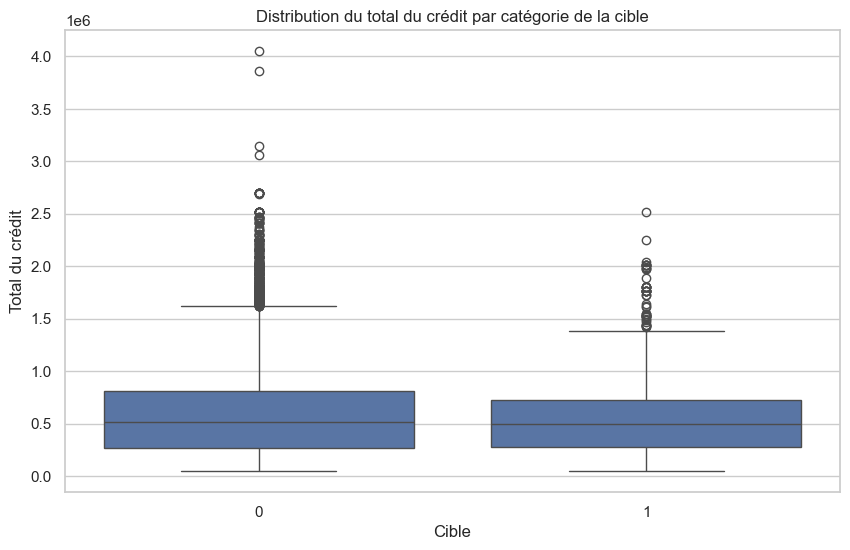

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="CIBLE", y="TOTAL_CREDIT", data=df)
plt.title("Distribution du total du crédit par catégorie de la cible")
plt.xlabel("Cible")
plt.ylabel("Total du crédit")
plt.show()

In [156]:
df["TOTAL_CREDIT"].describe().T

count    3.075100e+04
mean     5.976381e+05
std      3.998446e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: TOTAL_CREDIT, dtype: float64

In [157]:
df.columns.tolist()

['TYPE_CONTRAT',
 'AGE',
 'ID_CLIENT',
 'CIBLE',
 'STATUT_FAMILIAL',
 'YEARS_EMPLOYED',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'PROPRIETAIRE_BIEN_IMMO',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
 'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'PROPRIETAIRE_VOITURE']

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Analyse Exploratoire ---- Features catégorielles</b>
    </h2>
</div>


<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Cible x Biens immo</b>
    </h2>
</div>


C:\Users\acer6\AppData\Local\Temp\ipykernel_22292\2802182120.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




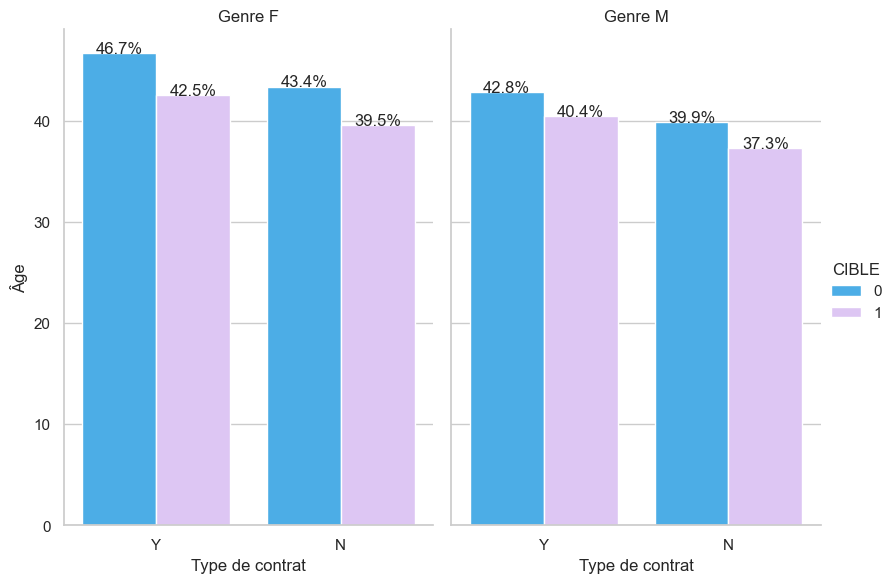

In [158]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="PROPRIETAIRE_BIEN_IMMO",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Type de contrat", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 350px;">
    <h2>
        <b> Relation Age x ANNEE TRAVAILLE</b>
    </h2>
</div>


In [159]:
df['YEARS_EMPLOYED']

0           0
1           2
2           2
3           5
4           0
         ... 
30746       3
30747      20
30748   -1000
30749   -1000
30750       3
Name: YEARS_EMPLOYED, Length: 30751, dtype: int64

In [160]:
df[df['YEARS_EMPLOYED']==-1000]

,TYPE_CONTRAT,AGE,ID_CLIENT,CIBLE,STATUT_FAMILIAL,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,PROPRIETAIRE_BIEN_IMMO,CNT_FAM_MEMBERS,TYPE_REVENUS,GENRE,MONTANT_PRIX_BIENS,NIVEAU_EDUCATION,REVENU_TOTAL,SOURCE_EXTERNE_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,PROPRIETAIRE_VOITURE
12,Revolving loans,65,439852,0,Married,-1000,337500.0,16875.0,Y,2.0,Pensioner,M,337500.0,Higher education,112500.0,0.651068,0,0,0,Y
15,Cash loans,64,308021,0,Married,-1000,364896.0,18760.5,Y,2.0,Pensioner,F,315000.0,Lower secondary,40500.0,0.635099,0,1,0,N
22,Cash loans,59,181619,0,Married,-1000,180000.0,16785.0,N,2.0,Pensioner,M,180000.0,Higher education,135000.0,0.747226,0,1,0,N
23,Cash loans,58,436648,0,Married,-1000,363190.5,28822.5,Y,2.0,Pensioner,F,328500.0,Secondary / secondary special,135000.0,0.157758,1,0,0,N
24,Cash loans,61,197628,0,Married,-1000,251091.0,27171.0,Y,2.0,Pensioner,F,238500.0,Secondary / secondary special,90000.0,0.194215,0,1,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30729,Cash loans,57,164235,0,Married,-1000,317979.0,13599.0,Y,2.0,Pensioner,F,274500.0,Secondary / secondary special,90000.0,0.251494,1,0,0,N
30743,Cash loans,60,150906,0,Married,-1000,121500.0,9211.5,Y,2.0,Pensioner,F,121500.0,Secondary / secondary special,103500.0,0.637346,0,1,0,N
30745,Cash loans,58,383550,0,Single / not married,-1000,1006920.0,48573.0,Y,1.0,Pensioner,M,900000.0,Higher education,405000.0,0.671204,1,0,0,N
30748,Revolving loans,44,384640,0,Married,-1000,247500.0,12375.0,Y,2.0,Pensioner,F,247500.0,Higher education,69750.0,0.673987,0,0,0,Y


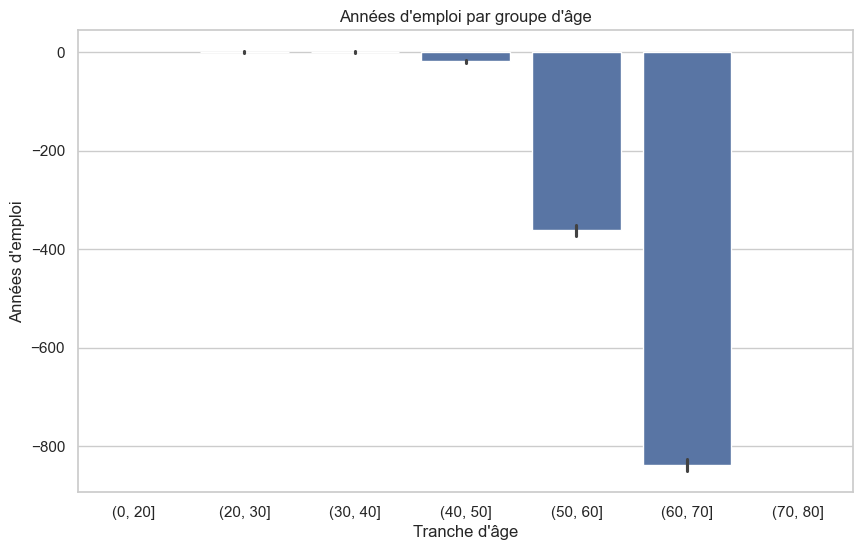

In [161]:
# Diagramme à barres de 'YEARS_EMPLOYED' par groupe d'âge
df['TRANCHE_AGE'] = pd.cut(df['AGE'], bins=[0, 20, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(10, 6))
sns.barplot(x='TRANCHE_AGE', y='YEARS_EMPLOYED', data=df)
plt.title('Années d\'emploi par groupe d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Années d\'emploi')
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 300px;">
    <h2>
        <b>Relation Cible x Voiture</b>
    </h2>
</div>


C:\Users\acer6\AppData\Local\Temp\ipykernel_22292\2611014336.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




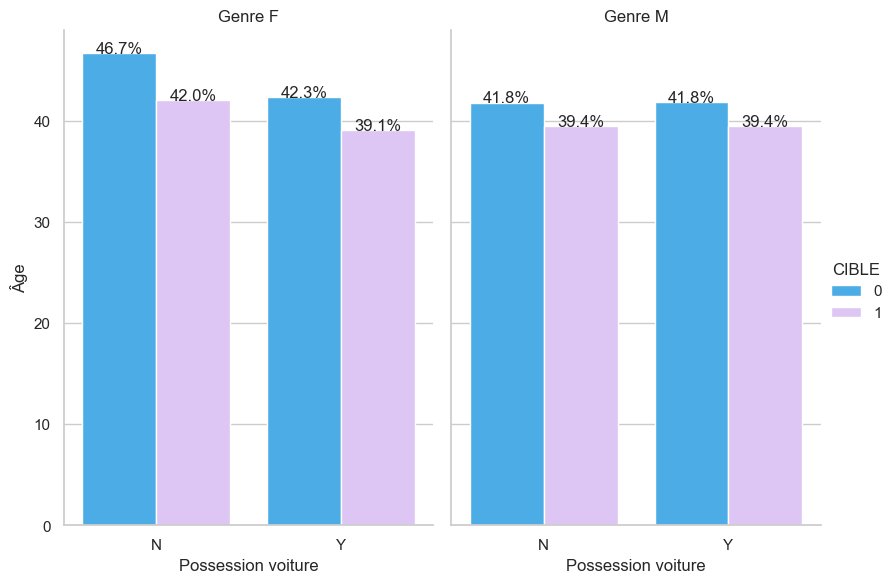

In [162]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="PROPRIETAIRE_VOITURE",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Possession voiture", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 500px;">
    <h2>
        <b>Relation Cible x Type de Contrat x Genre</b>
    </h2>
</div>


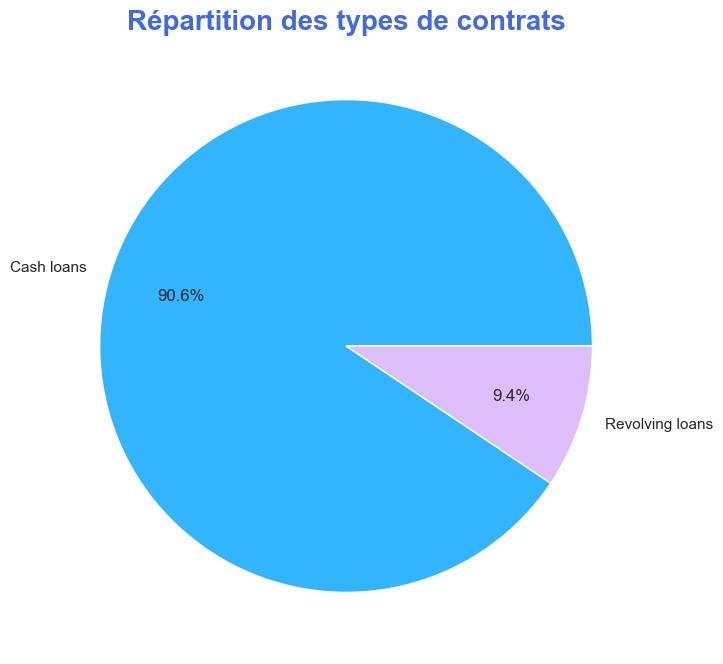

In [163]:
custom_palette = ["#33b4ff", "#debefa"]
note_pie = df["TYPE_CONTRAT"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    note_pie,
    labels=note_pie.index,
    colors=custom_palette,
    autopct="%1.1f%%",
    pctdistance=0.7,
)
plt.title(
    "Répartition des types de contrats",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.show()

C:\Users\acer6\AppData\Local\Temp\ipykernel_22292\3226085150.py:5: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




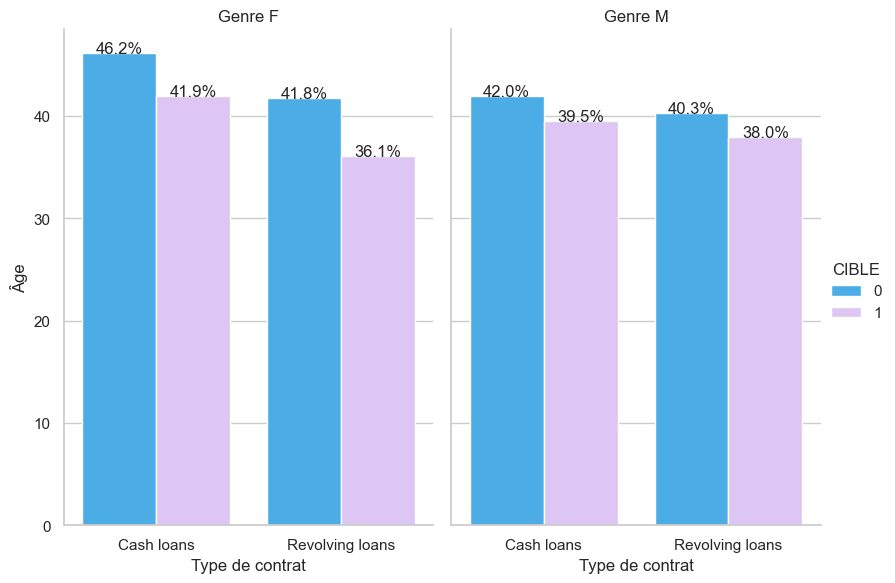

In [164]:
custom_palette = ["#33b4ff", "#debefa"]

sns.set(style="whitegrid")

g = sns.catplot(
    x="TYPE_CONTRAT",
    y="AGE",
    hue="CIBLE",
    col="GENRE",
    data=df,
    kind="bar",
    ci=None,
    palette=custom_palette,
    height=6,
    aspect=0.7,
)

g.set_axis_labels("Type de contrat", "Âge")
g.set_titles("Genre {col_name}")

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            height = p.get_height()
            ax.text(
                p.get_x() + p.get_width() / 2.0,
                height,
                "{:.1f}%".format(height),
                ha="center",
            )

plt.show()

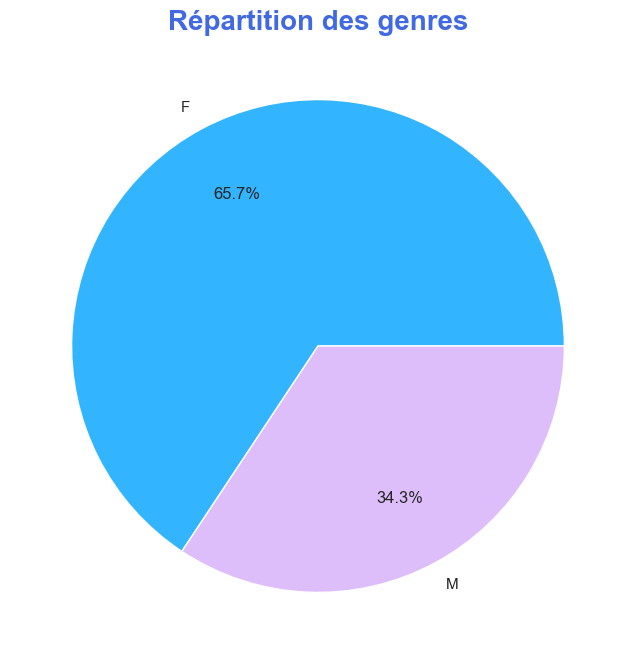

In [165]:
custom_palette = ["#33b4ff", "#debefa"]
note_pie = df["GENRE"].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(
    note_pie,
    labels=note_pie.index,
    colors=custom_palette,
    autopct="%1.1f%%",
    pctdistance=0.7,
)
plt.title("Répartition des genres", fontsize=20, fontweight="bold", color="RoyalBlue")
plt.show()

In [166]:
df["GENRE"].value_counts()

GENRE
F    20198
M    10553
Name: count, dtype: int64

In [167]:
df = df[df["GENRE"] != "XNA"]

<Figure size 1000x1000 with 0 Axes>

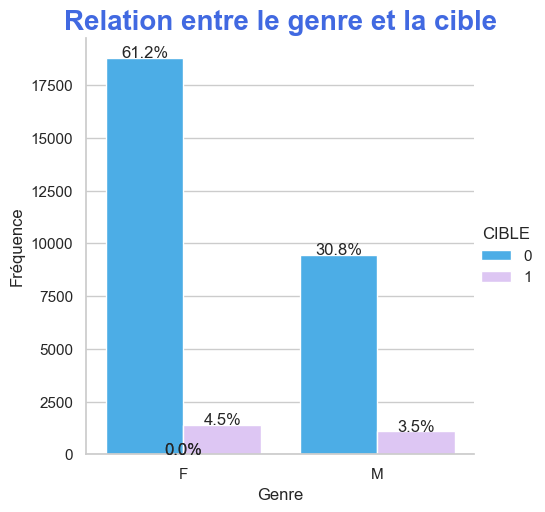

In [168]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))

# Tracer le graphique catégoriel
ax = sns.catplot(x="GENRE", hue="CIBLE", data=df, kind="count", palette=custom_palette)

total = float(len(df))
for p in ax.ax.patches:
    height = p.get_height()
    ax.ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Genre")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le genre et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)


# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 800px;">
    <h2>
        <b>Relation Cible x Satut familial</b>
    </h2>
</div>


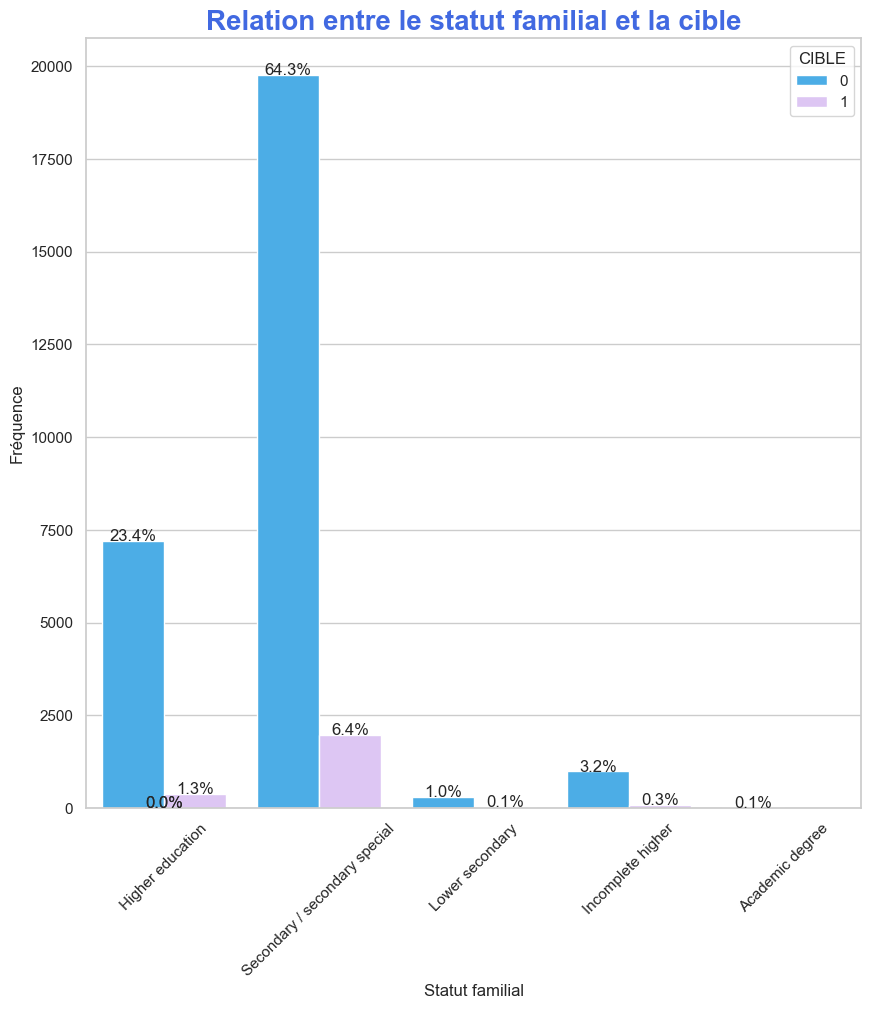

In [169]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="NIVEAU_EDUCATION", hue="CIBLE", data=df, palette=custom_palette)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Statut familial")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le statut familial et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.xticks(rotation=45)
# Afficher le graphique
plt.show()

<div style="background-color:#a2f5aa; padding: 1px; max-width: 800px;">
    <h2>
        <b>Relation Cible x Type de revenus</b>
    </h2>
</div>


In [170]:
df["TYPE_REVENUS"].value_counts()

TYPE_REVENUS
Working                 15960
Commercial associate     7028
Pensioner                5599
State servant            2157
Unemployed                  6
Maternity leave             1
Name: count, dtype: int64

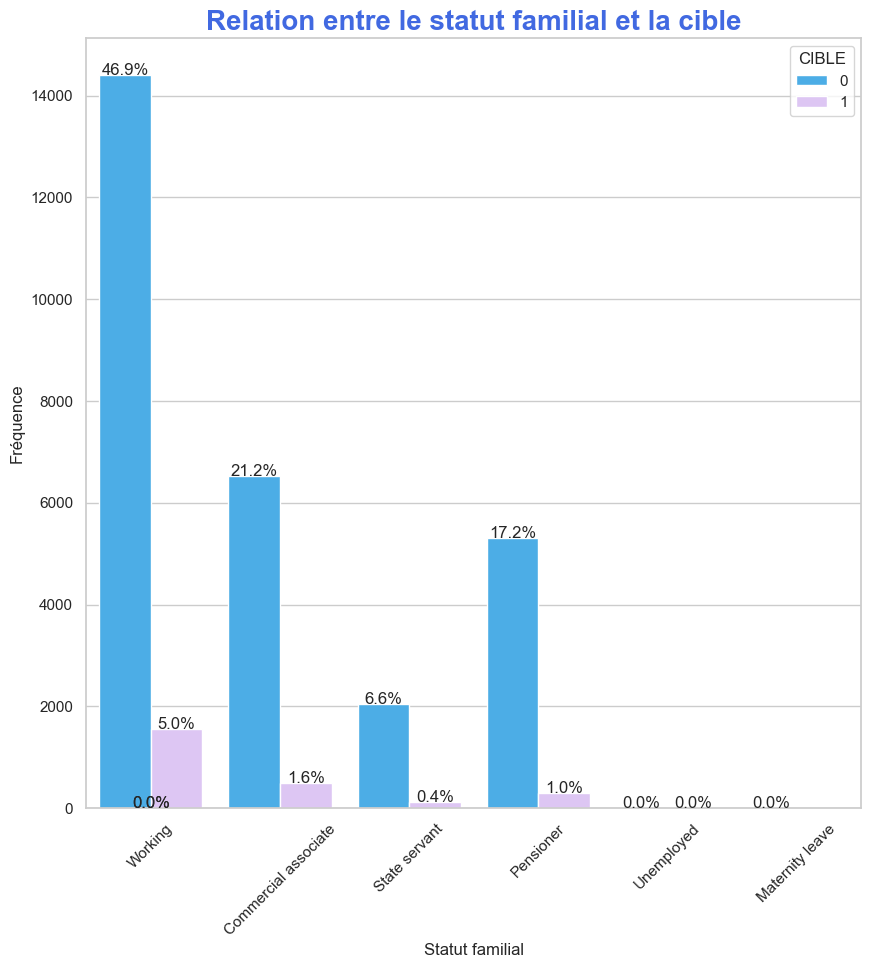

In [171]:
# Définition de la palette de couleurs personnalisée
custom_palette = ["#33b4ff", "#debefa"]

# Paramètres de style pour personnaliser le graphique
sns.set(style="whitegrid")

# Tracer le graphique catégoriel
plt.figure(figsize=(10, 10))
ax = sns.countplot(x="TYPE_REVENUS", hue="CIBLE", data=df, palette=custom_palette)

total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.0,
        height + 3,
        "{:.1f}%".format((height / total) * 100),
        ha="center",
    )

# Ajouter des titres et des étiquettes
plt.xlabel("Statut familial")
plt.ylabel("Fréquence")
plt.title(
    "Relation entre le statut familial et la cible",
    fontsize=20,
    fontweight="bold",
    color="RoyalBlue",
)
plt.xticks(rotation=45)
# Afficher le graphique
plt.show()

In [172]:
df.columns.tolist()

['TYPE_CONTRAT',
 'AGE',
 'ID_CLIENT',
 'CIBLE',
 'STATUT_FAMILIAL',
 'YEARS_EMPLOYED',
 'TOTAL_CREDIT',
 'REMB_MENSUEL',
 'PROPRIETAIRE_BIEN_IMMO',
 'CNT_FAM_MEMBERS',
 'TYPE_REVENUS',
 'GENRE',
 'MONTANT_PRIX_BIENS',
 'NIVEAU_EDUCATION',
 'REVENU_TOTAL',
 'SOURCE_EXTERNE_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'PROPRIETAIRE_VOITURE',
 'TRANCHE_AGE']

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Préparation données pour modélisation</b>
    </h2>
</div>


Traitement des variables catégorielles

In [173]:
df.dtypes

TYPE_CONTRAT                object
AGE                          int64
ID_CLIENT                    int64
CIBLE                        int64
STATUT_FAMILIAL             object
YEARS_EMPLOYED               int64
TOTAL_CREDIT               float64
REMB_MENSUEL               float64
PROPRIETAIRE_BIEN_IMMO      object
CNT_FAM_MEMBERS            float64
TYPE_REVENUS                object
GENRE                       object
MONTANT_PRIX_BIENS         float64
NIVEAU_EDUCATION            object
REVENU_TOTAL               float64
SOURCE_EXTERNE_2           float64
FLAG_DOCUMENT_3              int64
FLAG_DOCUMENT_6              int64
FLAG_DOCUMENT_8              int64
PROPRIETAIRE_VOITURE        object
TRANCHE_AGE               category
dtype: object

In [174]:
colonnes_a_convertir = ['FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8']

# Convertir les colonnes en type 'object'
df[colonnes_a_convertir] = df[colonnes_a_convertir].astype(str)


In [175]:
df.dtypes

TYPE_CONTRAT                object
AGE                          int64
ID_CLIENT                    int64
CIBLE                        int64
STATUT_FAMILIAL             object
YEARS_EMPLOYED               int64
TOTAL_CREDIT               float64
REMB_MENSUEL               float64
PROPRIETAIRE_BIEN_IMMO      object
CNT_FAM_MEMBERS            float64
TYPE_REVENUS                object
GENRE                       object
MONTANT_PRIX_BIENS         float64
NIVEAU_EDUCATION            object
REVENU_TOTAL               float64
SOURCE_EXTERNE_2           float64
FLAG_DOCUMENT_3             object
FLAG_DOCUMENT_6             object
FLAG_DOCUMENT_8             object
PROPRIETAIRE_VOITURE        object
TRANCHE_AGE               category
dtype: object

In [176]:
df.drop(columns=['TRANCHE_AGE'], inplace=True)


In [177]:
liste = df.select_dtypes(include='object').columns.to_list()
print("nombre de variables catégorielle :", len(liste), end="\n")
liste

nombre de variables catégorielle : 10


['TYPE_CONTRAT',
 'STATUT_FAMILIAL',
 'PROPRIETAIRE_BIEN_IMMO',
 'TYPE_REVENUS',
 'GENRE',
 'NIVEAU_EDUCATION',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'PROPRIETAIRE_VOITURE']

In [178]:
col_cat = ['TYPE_CONTRAT',
 'STATUT_FAMILIAL','PROPRIETAIRE_BIEN_IMMO',
 'TYPE_REVENUS',
 'GENRE',
 'NIVEAU_EDUCATION',
 'PROPRIETAIRE_VOITURE','FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8']


# Afficher les valeurs uniques pour chaque colonne
for col in col_cat:
    print(col, df[col].unique())

TYPE_CONTRAT ['Cash loans' 'Revolving loans']
STATUT_FAMILIAL ['Married' 'Civil marriage' 'Single / not married' 'Separated' 'Widow']
PROPRIETAIRE_BIEN_IMMO ['Y' 'N']
TYPE_REVENUS ['Working' 'Commercial associate' 'State servant' 'Pensioner' 'Unemployed'
 'Maternity leave']
GENRE ['F' 'M']
NIVEAU_EDUCATION ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
PROPRIETAIRE_VOITURE ['N' 'Y']
FLAG_DOCUMENT_3 ['1' '0']
FLAG_DOCUMENT_6 ['0' '1']
FLAG_DOCUMENT_8 ['0' '1']


In [179]:
df[col_cat].isna().mean().round(2)

TYPE_CONTRAT              0.0
STATUT_FAMILIAL           0.0
PROPRIETAIRE_BIEN_IMMO    0.0
TYPE_REVENUS              0.0
GENRE                     0.0
NIVEAU_EDUCATION          0.0
PROPRIETAIRE_VOITURE      0.0
FLAG_DOCUMENT_3           0.0
FLAG_DOCUMENT_6           0.0
FLAG_DOCUMENT_8           0.0
dtype: float64

In [180]:
var_cat_nominale = ['TYPE_CONTRAT',
 'STATUT_FAMILIAL','PROPRIETAIRE_BIEN_IMMO',
 'TYPE_REVENUS',
 'GENRE',
 'NIVEAU_EDUCATION',
 'PROPRIETAIRE_VOITURE']

In [181]:
# Encoder les variables catégorielles nominales
df = pd.get_dummies(df, columns=var_cat_nominale, drop_first=True)

# Convertir les colonnes booléennes en type entier (0 et 1)
colonnes_bool = df.select_dtypes(include='bool').columns
df[colonnes_bool] = df[colonnes_bool].astype(int)





In [182]:

df.dtypes

AGE                                                 int64
ID_CLIENT                                           int64
CIBLE                                               int64
YEARS_EMPLOYED                                      int64
TOTAL_CREDIT                                      float64
REMB_MENSUEL                                      float64
CNT_FAM_MEMBERS                                   float64
MONTANT_PRIX_BIENS                                float64
REVENU_TOTAL                                      float64
SOURCE_EXTERNE_2                                  float64
FLAG_DOCUMENT_3                                    object
FLAG_DOCUMENT_6                                    object
FLAG_DOCUMENT_8                                    object
TYPE_CONTRAT_Revolving loans                        int32
STATUT_FAMILIAL_Married                             int32
STATUT_FAMILIAL_Separated                           int32
STATUT_FAMILIAL_Single / not married                int32
STATUT_FAMILIA

In [183]:
df['STATUT_FAMILIAL_Married']

0        1
1        0
2        0
3        1
4        1
        ..
30746    1
30747    0
30748    1
30749    0
30750    0
Name: STATUT_FAMILIAL_Married, Length: 30751, dtype: int32

In [184]:
df['CNT_FAM_MEMBERS'].unique()

array([ 2.,  1.,  3.,  5.,  4.,  6.,  7.,  8., 14.])

In [185]:
# Définir la fonction de mapping
def map_nbr_enfants(x):
    if x == 1:
        return 0
    elif x == 2:
        return 1
    else:
        return 2

# Appliquer la fonction de mapping pour créer 'nbr_enfants'
df['nbr_membre'] = df['CNT_FAM_MEMBERS'].apply(map_nbr_enfants)


In [186]:
df['nbr_membre'].unique()

array([1, 0, 2], dtype=int64)

In [187]:
df

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,196888,0,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,...,0,0,1,0,1,0,0,0,0,1
1,54,101392,0,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,...,0,0,1,0,1,0,0,0,1,1
2,25,435135,0,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,...,0,0,1,0,1,0,0,0,0,0
3,30,396314,0,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,...,0,0,1,1,1,0,0,0,0,1
4,44,341153,1,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,41,311641,0,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,...,1,0,0,0,0,0,0,1,0,2
30747,38,151728,1,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,...,0,0,1,1,0,0,0,1,0,0
30748,44,384640,0,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,...,0,0,0,0,1,0,0,0,1,1
30749,60,437079,0,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,...,0,0,0,0,0,0,0,1,0,0


In [188]:
df['NIVEAU_EDUCATION_Higher education'].unique()


array([1, 0])

<div style="background-color:#d699f2; padding: 10px">
    <h2>
        <b> Export & Save</b>
    </h2>
</div>


In [189]:
df.to_csv("app_train_sample_clean.csv", index=False)

In [190]:
df

,AGE,ID_CLIENT,CIBLE,YEARS_EMPLOYED,TOTAL_CREDIT,REMB_MENSUEL,CNT_FAM_MEMBERS,MONTANT_PRIX_BIENS,REVENU_TOTAL,SOURCE_EXTERNE_2,...,TYPE_REVENUS_State servant,TYPE_REVENUS_Unemployed,TYPE_REVENUS_Working,GENRE_M,NIVEAU_EDUCATION_Higher education,NIVEAU_EDUCATION_Incomplete higher,NIVEAU_EDUCATION_Lower secondary,NIVEAU_EDUCATION_Secondary / secondary special,PROPRIETAIRE_VOITURE_Y,nbr_membre
0,48,196888,0,0,1350000.0,39604.5,2.0,1350000.0,135000.0,0.761443,...,0,0,1,0,1,0,0,0,0,1
1,54,101392,0,2,573628.5,24435.0,2.0,463500.0,81000.0,0.396825,...,0,0,1,0,1,0,0,0,1,1
2,25,435135,0,2,298512.0,19948.5,1.0,270000.0,112500.0,0.385353,...,0,0,1,0,1,0,0,0,0,0
3,30,396314,0,5,218016.0,17352.0,2.0,180000.0,81000.0,0.545649,...,0,0,1,1,1,0,0,0,0,1
4,44,341153,1,0,1006920.0,42790.5,2.0,900000.0,90000.0,0.444443,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,41,311641,0,3,808650.0,23773.5,3.0,675000.0,90000.0,0.621768,...,1,0,0,0,0,0,0,1,0,2
30747,38,151728,1,20,85500.0,9108.0,1.0,85500.0,40500.0,0.393861,...,0,0,1,1,0,0,0,1,0,0
30748,44,384640,0,-1000,247500.0,12375.0,2.0,247500.0,69750.0,0.673987,...,0,0,0,0,1,0,0,0,1,1
30749,60,437079,0,-1000,270000.0,9828.0,1.0,270000.0,36000.0,0.546689,...,0,0,0,0,0,0,0,1,0,0


In [192]:
df['GENRE_M'].unique()

array([0, 1])

Analyse bivariée en fonction de la cible
discribe(round.2) a chaque graph
+ distribution 
Conserver soit age soit date de naissance
regarder val aberrantes